# Histogramas, Binnings y Densidad

Un simple histograma puede ser un gran primer paso en la comprensión de un conjunto de datos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data = np.random.randn(1000) # el rand da valores con una distribucion seminormal 

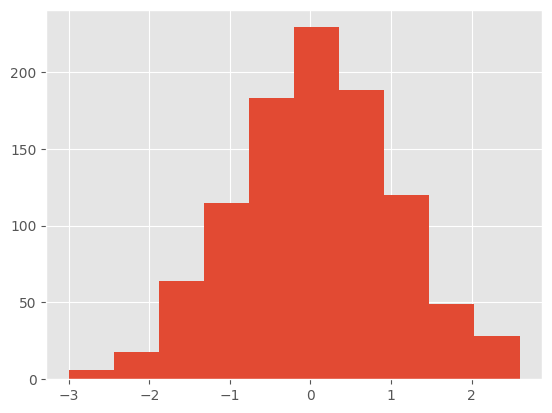

In [2]:
plt.hist(data);

La función ``hist()`` tiene muchas opciones para ajustar tanto el cálculo como la visualización;

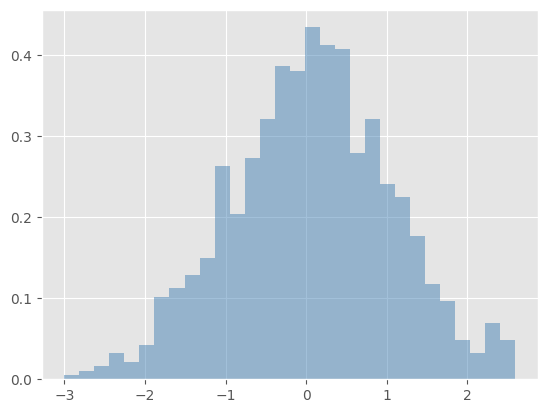

In [3]:
plt.hist(data, bins=30, density=True, alpha=0.5, # cuantos mas beans mas subgrupos 
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

La combinación de ``histtype='stepfilled'`` junto con algo de transparencia ``alpha`` es muy útil a la hora de comparar histogramas de varias distribuciones:

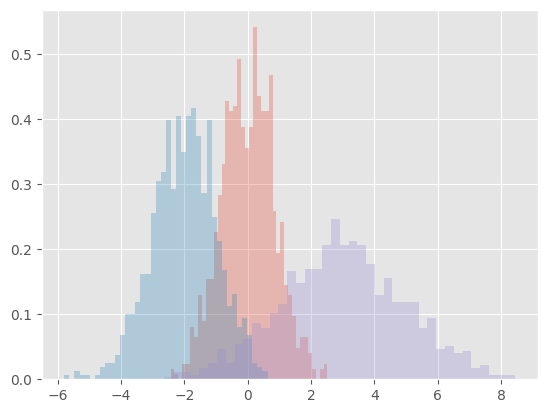

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Si desea simplemente calcular el histograma (es decir, contar el número de puntos en un intervalo determinado) y no mostrarlo, tiene a su disposición la función ``np.histogram()``:

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 24 179 412 308  77]


## Histogramas bidimensionales y Binnings

Al igual que creamos histogramas en una dimensión dividiendo la recta numérica en bins, también podemos crear histogramas en dos dimensiones dividiendo los puntos entre bins bidimensionales.
Aquí veremos brevemente varias formas de hacerlo.
Empezaremos definiendo algunos datos como una matriz ``x`` e ``y`` extraída de una distribución multivariante gaussiana:

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Histograma bidimensional

Una forma sencilla de trazar un histograma bidimensional es utilizar la función ``plt.hist2d`` de Matplotlib:

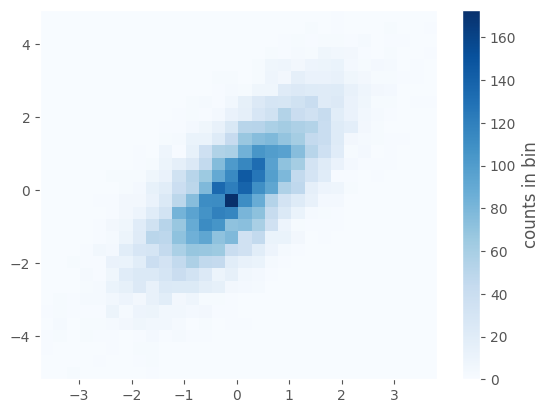

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues') #los bins son un calculo para encontrar el optimo
cb = plt.colorbar()
cb.set_label('counts in bin')

Al igual que ``plt.hist``, ``plt.hist2d`` tiene una serie de opciones adicionales para ajustar el gráfico y el binning, que se describen en la documentación de la función.

### ``plt.hexbin``: Hexagonal binnings

El histograma bidimensional crea un teselado de cuadrados a través de los ejes.
Otra forma natural para tal teselación es el hexágono regular.
Para este propósito, Matplotlib proporciona la rutina ``plt.hexbin``, que representa un conjunto de datos bidimensionales agrupados dentro de una rejilla de hexágonos:

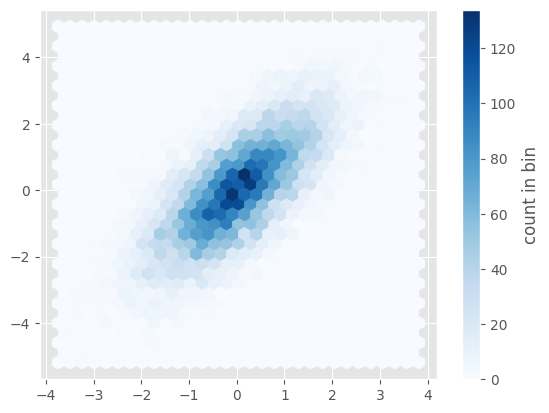

In [8]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Estimación de la densidad del kernel

Otro método común para evaluar densidades en múltiples dimensiones es la *estimación de la densidad del kernel* (KDE).
KDE puede considerarse como una forma de "manchar" los puntos en el espacio y sumar el resultado para obtener una función suave.
Existe una implementación de KDE extremadamente rápida y sencilla en el paquete ``scipy.stats``.
He aquí un ejemplo rápido del uso de KDE con estos datos:

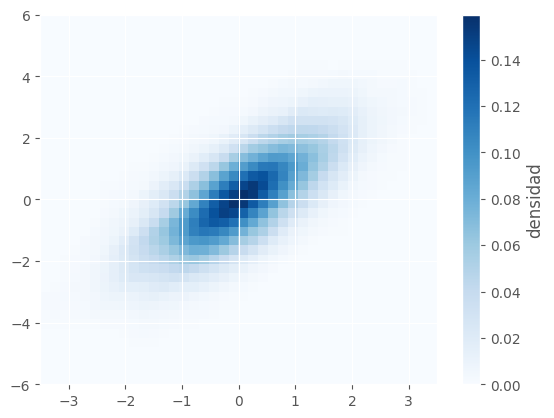

In [9]:
from scipy.stats import gaussian_kde

# ajustar una matriz de tamaño [Ndim, Nmuestras].
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluar en una cuadrícula regular
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Trazar el resultado como una imagen
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("densidad")

<!--NAVIGATION-->
< [Gráficos de densidad y contorno](4-Density_y_Contour_Plots.ipynb) | [Customizado de Legenda](6-Customizing_Legends.ipynb) >
